In [ ]:
'''
1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
•	Handle missing values as per the best practices (imputation, removal, etc.).
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.

'''

'\n1. Data Exploration and Preprocessing:\n•\tLoad the dataset and conduct basic data exploration (summary statistics, missing values, data types).\n•\tHandle missing values as per the best practices (imputation, removal, etc.).\n•\tApply scaling techniques to numerical features:\n•\tStandard Scaling\n•\tMin-Max Scaling\n•\tDiscuss the scenarios where each scaling technique is preferred and why.\n\n'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('/content/sample_data/adult_with_headers.csv')

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# No missing values found and data types for all columns are detected correctly

In [ ]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data[data.education_num==10].head(1) #education no 10 corresponds to category 'Some-college' in education field

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [ ]:
'''
1. Most number of working people are around the age of 37.
2. The minimum age of working people is 17 and maximum age is 90
3. The maximum number of working group belong from education_num 10 which corresponds to 'Some-college' category in education field.
4. The maximum capital gain and capital loss is 99999 and 4356 respectively.
5. Most people work for 40 hours per week

'''


"\n1. Most number of working people are around the age of 37.\n2. The minimum age of working people is 17 and maximum age is 90\n3. The maximum number of working group belong from education_num 10 which corresponds to 'Some-college' category in education field.\n4. The maximum capital gain and capital loss is 99999 and 4356 respectively.\n5. Most people work for 40 hours per week\n\n"

In [ ]:
# Scaling

In [ ]:
selected_col = data[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']]  #numerical columns

In [ ]:
# Minmax Scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit_transform(selected_col)

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [ ]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(selected_col)

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [ ]:
'''
Scaling is done to avoid biasness as the model generally treats higher values as important
Two types of scaling: MinMax (normalization) and Standard Scaling
MinMax:
  1. Transforms features by scaling each feature to a range, usually between 0 and 1.
  2. The approximate upper and lower bounds of the dataset is known, and the dataset has few or no outliers
Standard:
  1. Transforms features by scaling each feature to a range, usually between -3σ and +3σ.
  2. Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the
     feature columns take the form of a normal distribution, which makes it easier to learn the weights.
'''

'\nScaling is done to avoid biasness as the model generally treats higher values as important\nTwo types of scaling: MinMax (normalization) and Standard Scaling\nMinMax:\n  1. Transforms features by scaling each feature to a range, usually between 0 and 1.\n  2. The approximate upper and lower bounds of the dataset is known, and the dataset has few or no outliers\nStandard:\n  1. Transforms features by scaling each feature to a range, usually between -3σ and +3σ.\n  2. Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the\n     feature columns take the form of a normal distribution, which makes it easier to learn the weights.\n'

# Encoding Techniques:


In [ ]:
'''
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

'''

'\n•\tApply One-Hot Encoding to categorical variables with less than 5 categories.\n•\tUse Label Encoding for categorical variables with more than 5 categories.\n•\tDiscuss the pros and cons of One-Hot Encoding and Label Encoding.\n\n'

In [ ]:
# Label Encoding: columns like workclass,education,marital_status,occupation,relationship and native country have more than 5 categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for column in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
print(data)

       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship    race      sex  capital_gain  capital_loss  \
0               1  

In [ ]:
# One-Hot Encoding: race, sex, income are the columns with less than 5 categories

In [ ]:
data = pd.get_dummies(data = data, columns=['race','sex','income'], dtype=int)

In [ ]:
'''
One-Hot Encoding:
  Pros:
    1. Treats each category as unique.
    2. Works well with many machine learning models.
  Cons:
    1. Increases the number of features.
    2. Uses more memory due to many zero entries.

Label Encoding:
  Pros:
    1. Easy to implement.
    2. Uses less memory and is faster.
  Cons:
    1. Implies a ranking of categories which gives false order.
    2. Not suitable for algorithms that assume numerical order.

'''

'\nOne-Hot Encoding:\n  Pros:\n    1. Treats each category as unique.\n    2. Works well with many machine learning models.\n  Cons:\n    1. Increases the number of features.\n    2. Uses more memory due to many zero entries.\n\nLabel Encoding:\n  Pros:\n    1. Easy to implement.\n    2. Uses less memory and is faster.\n  Cons:\n    1. Implies a ranking of categories which gives false order.\n    2. Not suitable for algorithms that assume numerical order.\n\n'

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,2174,0,...,39,0,0,0,0,1,0,1,1,0
1,50,6,83311,9,13,2,4,0,0,0,...,39,0,0,0,0,1,0,1,1,0
2,38,4,215646,11,9,0,6,1,0,0,...,39,0,0,0,0,1,0,1,1,0
3,53,4,234721,1,7,2,6,0,0,0,...,39,0,0,1,0,0,0,1,1,0
4,28,4,338409,9,13,2,10,5,0,0,...,5,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,...,39,0,0,0,0,1,1,0,1,0
32557,40,4,154374,11,9,2,7,0,0,0,...,39,0,0,0,0,1,0,1,0,1
32558,58,4,151910,11,9,6,1,4,0,0,...,39,0,0,0,0,1,1,0,1,0
32559,22,4,201490,11,9,4,1,3,0,0,...,39,0,0,0,0,1,0,1,1,0


In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male',
       'income_ <=50K', 'income_ >50K'],
      dtype='object')

# Feature Engineering

In [ ]:
'''
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

'''

'\n•\tCreate at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.\n•\tApply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.\n\n'

In [ ]:
data['net_capital_gain'] = data.capital_gain - data.capital_loss

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male',
       'income_ <=50K', 'income_ >50K', 'net_capital_gain'],
      dtype='object')

In [ ]:
avg_hours_per_occupation = data.groupby('occupation')['hours_per_week'].mean()

In [ ]:
data = data.merge(avg_hours_per_occupation, on='occupation', suffixes=('','_avg'))

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male',
       'income_ <=50K', 'income_ >50K', 'net_capital_gain',
       'hours_per_week_avg'],
      dtype='object')

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,net_capital_gain,hours_per_week_avg
0,39,7,77516,9,13,4,1,1,2174,0,...,0,0,0,1,0,1,1,0,2174,37.558355
1,23,4,122272,9,13,4,1,3,0,0,...,0,0,0,1,1,0,1,0,0,37.558355
2,30,1,59951,15,10,2,1,3,0,0,...,0,0,0,1,0,1,1,0,0,37.558355
3,19,4,544091,11,9,1,1,5,0,0,...,0,0,0,1,1,0,1,0,0,37.558355
4,49,4,94638,11,9,5,1,4,0,0,...,0,0,0,1,1,0,1,0,0,37.558355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,17,4,79682,0,6,4,9,2,0,0,...,0,0,0,1,0,1,1,0,0,32.885906
32557,27,4,363053,6,5,4,9,4,0,0,...,0,0,0,1,1,0,1,0,0,32.885906
32558,24,4,213902,5,4,4,9,3,0,0,...,0,0,0,1,1,0,1,0,0,32.885906
32559,19,4,188568,15,10,4,9,1,0,0,...,0,0,0,1,1,0,1,0,0,32.885906


In [ ]:
# new features - net_capital_gain and avg_hours_per_occupation
# 1. net_capital_gain: we calculated this, subtracting capital_loss from capital_gain. This column tells us the total gain value of an individual
# 2. avg_hours_per_occupation : Here, we found average hours people work from a certain occupation. This was calculated by grouping data on occuaption and working out the mean of hours per week

In [ ]:
selected_col = data[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']]  #numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_values = scaler.fit_transform(selected_col)

In [ ]:
scaled_df = pd.DataFrame(scaled_values,columns = selected_col.columns)

In [ ]:
scaled_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,-1.142331,-0.639578,1.134739,-0.145920,-0.21666,-0.845327
2,-0.629143,-1.230027,-0.031360,-0.145920,-0.21666,-0.035429
3,-1.435581,3.356875,-0.420060,-0.145920,-0.21666,-1.250276
4,0.763796,-0.901391,-0.420060,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-1.582206,-1.043089,-1.586158,-0.145920,-0.21666,-0.845327
32557,-0.849080,1.641661,-1.974858,-0.145920,-0.21666,-1.331266
32558,-1.069018,0.228555,-2.363558,-0.145920,-0.21666,-0.683348
32559,-1.435581,-0.011467,-0.031360,-0.145920,-0.21666,-0.035429


[]

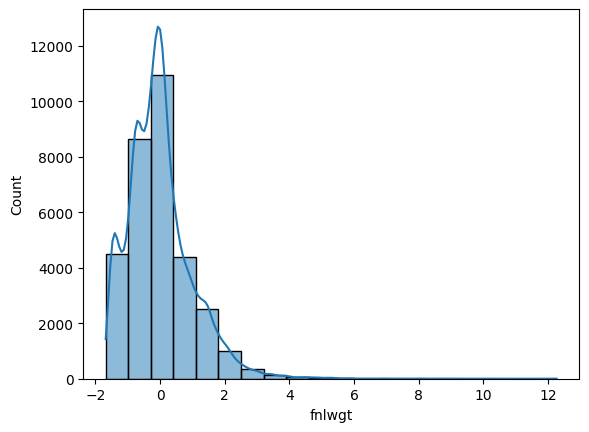

In [ ]:
sns.histplot(scaled_df.fnlwgt,bins=20, kde = True)
plt.plot()

In [ ]:
# will use sqrt transformation on numerical column "fnlwgt", as it shows right skewed distribution

In [ ]:
import warnings
warnings.filterwarnings('ignore')


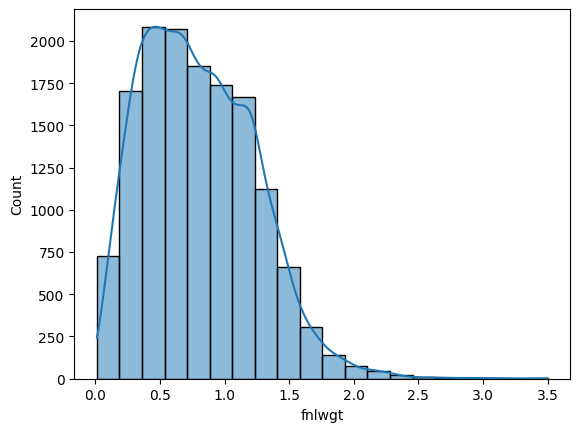

In [ ]:
sns.histplot(np.sqrt(scaled_df.fnlwgt),bins =20, kde=True);

## Feature Selection

In [ ]:
'''
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.
'''

'\n•\tUse the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.\n•\tApply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.\n'

In [ ]:
# Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
iso = IsolationForest(contamination=0.1,random_state=42)

In [ ]:
iso.fit(data)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
data['anomaly'] = iso.predict(data)

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,net_capital_gain,hours_per_week_avg,anomaly
0,39,7,77516,9,13,4,1,1,2174,0,...,0,0,1,0,1,1,0,2174,37.558355,1
1,23,4,122272,9,13,4,1,3,0,0,...,0,0,1,1,0,1,0,0,37.558355,1
2,30,1,59951,15,10,2,1,3,0,0,...,0,0,1,0,1,1,0,0,37.558355,1
3,19,4,544091,11,9,1,1,5,0,0,...,0,0,1,1,0,1,0,0,37.558355,1
4,49,4,94638,11,9,5,1,4,0,0,...,0,0,1,1,0,1,0,0,37.558355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,17,4,79682,0,6,4,9,2,0,0,...,0,0,1,0,1,1,0,0,32.885906,1
32557,27,4,363053,6,5,4,9,4,0,0,...,0,0,1,1,0,1,0,0,32.885906,1
32558,24,4,213902,5,4,4,9,3,0,0,...,0,0,1,1,0,1,0,0,32.885906,1
32559,19,4,188568,15,10,4,9,1,0,0,...,0,0,1,1,0,1,0,0,32.885906,1


In [ ]:
data.anomaly.value_counts()

 1    29305
-1     3256
Name: anomaly, dtype: int64

In [ ]:
data['scores'] = iso.decision_function(data.iloc[:,0:23])

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,net_capital_gain,hours_per_week_avg,anomaly,scores
0,39,7,77516,9,13,4,1,1,2174,0,...,0,1,0,1,1,0,2174,37.558355,1,0.072372
1,23,4,122272,9,13,4,1,3,0,0,...,0,1,1,0,1,0,0,37.558355,1,0.102474
2,30,1,59951,15,10,2,1,3,0,0,...,0,1,0,1,1,0,0,37.558355,1,0.106591
3,19,4,544091,11,9,1,1,5,0,0,...,0,1,1,0,1,0,0,37.558355,1,0.047256
4,49,4,94638,11,9,5,1,4,0,0,...,0,1,1,0,1,0,0,37.558355,1,0.107713


In [ ]:
# removing outliers (-1 - outliers | 1 - clean data)
outliers = data[data.anomaly == -1]
cleaned_data = data[data.anomaly == 1]

In [ ]:
cleaned_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,net_capital_gain,hours_per_week_avg,anomaly,scores
0,39,7,77516,9,13,4,1,1,2174,0,...,0,1,0,1,1,0,2174,37.558355,1,0.072372
1,23,4,122272,9,13,4,1,3,0,0,...,0,1,1,0,1,0,0,37.558355,1,0.102474
2,30,1,59951,15,10,2,1,3,0,0,...,0,1,0,1,1,0,0,37.558355,1,0.106591
3,19,4,544091,11,9,1,1,5,0,0,...,0,1,1,0,1,0,0,37.558355,1,0.047256
4,49,4,94638,11,9,5,1,4,0,0,...,0,1,1,0,1,0,0,37.558355,1,0.107713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,17,4,79682,0,6,4,9,2,0,0,...,0,1,0,1,1,0,0,32.885906,1,0.077762
32557,27,4,363053,6,5,4,9,4,0,0,...,0,1,1,0,1,0,0,32.885906,1,0.018023
32558,24,4,213902,5,4,4,9,3,0,0,...,0,1,1,0,1,0,0,32.885906,1,0.017412
32559,19,4,188568,15,10,4,9,1,0,0,...,0,1,1,0,1,0,0,32.885906,1,0.098196


In [ ]:
'''
How Outliers Can Affect Model Performance:
1. Outliers can skew the results of performance metrics like mean, variance, and standard deviation, leading to misleading insight.
2. Models can become biased if outliers dominate the training process, potentially leading to overfitting to the anomalous points.
3. Predictions can become less accurate as the model tries to accommodate the noise introduced by outliers.
4. The presence of outliers can increase the training time as models attempt to fit to these extreme values.
5. Models trained with outliers may not generalize well to new data, as they learn patterns that are not representative
   of the majority of the data.

'''

In [ ]:
#PPS Score

In [ ]:
pip install ppscore

In [ ]:
import ppscore as pps

In [ ]:
pps_matrix = pps.matrix(data)

In [ ]:
pps_matrix[['x','y','ppscore']]

,x,y,ppscore
0,age,age,1.000000
1,age,workclass,0.000000
2,age,fnlwgt,0.000000
3,age,education,0.000000
4,age,education_num,0.000000
...,...,...,...
620,scores,income_ >50K,0.000000
621,scores,net_capital_gain,0.000000
622,scores,hours_per_week_avg,0.000000
623,scores,anomaly,0.998031


In [ ]:
data.corr()

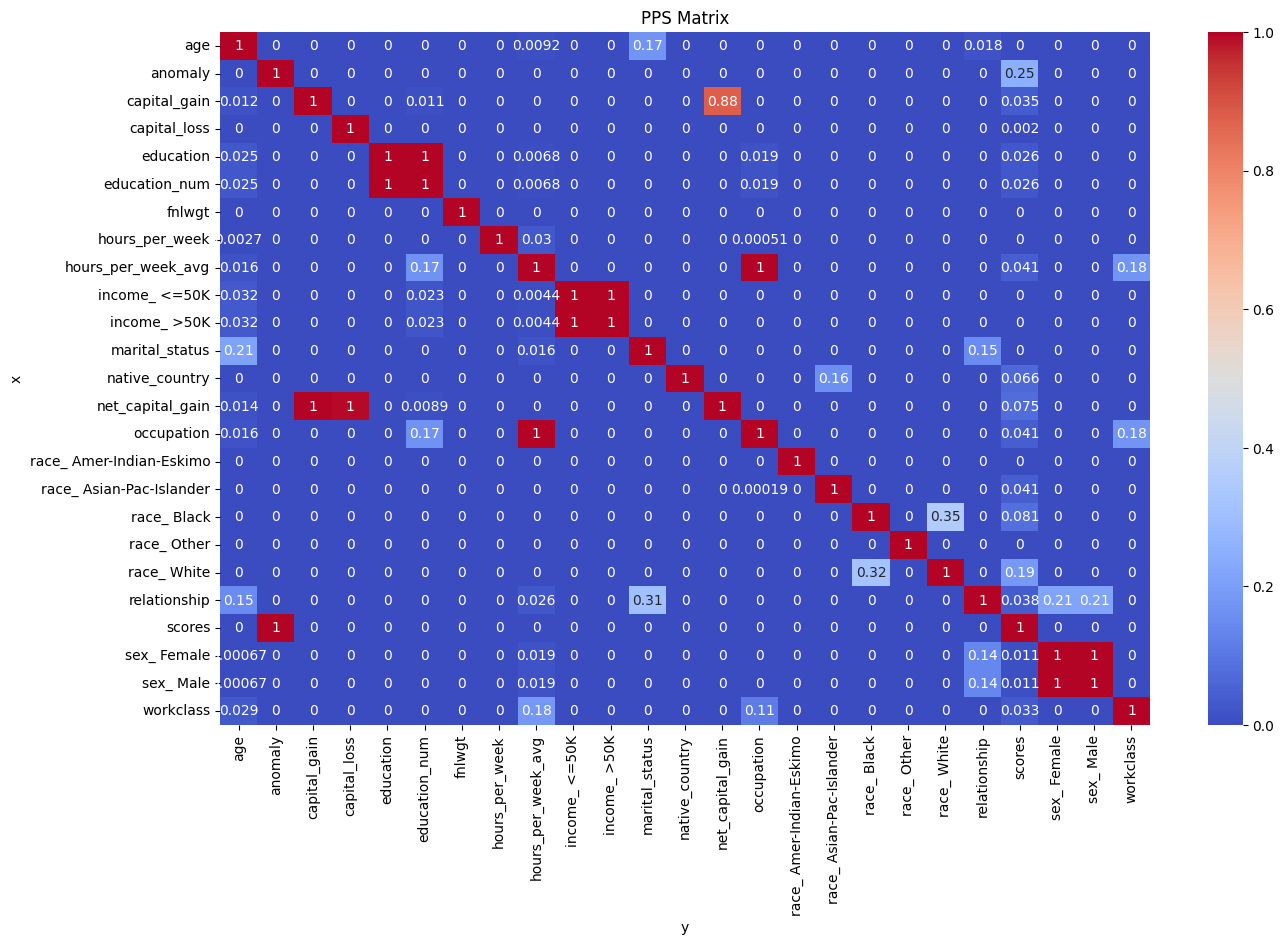

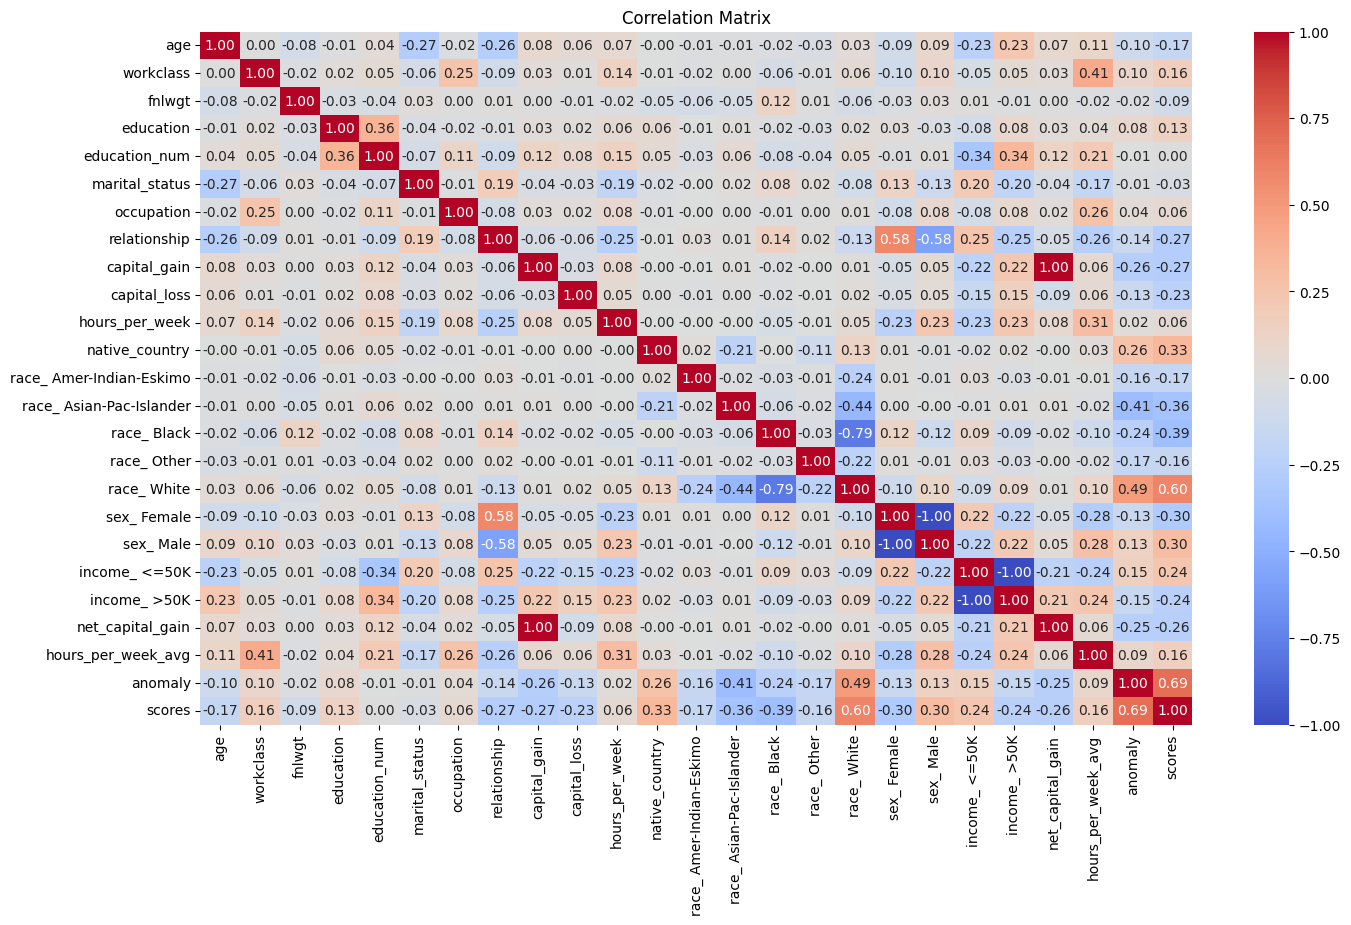

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(pps_matrix.pivot('x','y','ppscore'), annot = True, cmap = 'coolwarm')
plt.title('PPS Matrix')
plt.show()

plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot = True,fmt='.2f', cmap ='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
'''
  PPS Matrix
1. 'capital_gain' has a high PPS score (0.88) when predicting 'net_capital_gain'
2. 'relationship' has a significant predictive power (0.31) for 'marital_status'.

  Correlation Matrix
1. 'sex_Female' and 'sex_Male' have a perfect negative correlation (-1.00), which
    is expected since they are binary and mutually exclusive.
2. 'income_<=50K' and 'income_>50K' also show a perfect negative correlation (-1.00),
   which is also expected.
3. 'net_capital_gain' and 'capital_gain' shows a perfect positive correlation (1.00)

'''